In [1]:
pip install pyarabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.6 MB/s eta 0:00:00


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from wordcloud import WordCloud

from pyarabic import araby
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, FeatureUnion

from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC



from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
# df = pd.read_csv('final_df.csv', index_col=False)
df1 = pd.read_csv('datasetBeta.csv')
df2 = pd.read_csv('train_sent.csv', index_col=False)
df3 = pd.read_csv('test_sent.csv', index_col=False)

In [4]:
df4 = pd.read_csv('final.csv')

In [5]:
df5 = pd.read_csv('Algerian Review (1).csv')
df5 = df5[['comment', 'sentiment']]
df5.columns = ['Post', 'Polarity Class']
df5 = df5[df5['Polarity Class'] != 0]

In [6]:
df4.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df1.columns

Index(['Post', 'Polarity Class'], dtype='object')

In [8]:
for df in [df2, df3, df4, df5]:
  df.columns = ['Post', 'Polarity Class']
  print(df.columns)

Index(['Post', 'Polarity Class'], dtype='object')
Index(['Post', 'Polarity Class'], dtype='object')
Index(['Post', 'Polarity Class'], dtype='object')
Index(['Post', 'Polarity Class'], dtype='object')


In [ ]:
df2.sample(10)

,Post,Polarity Class
3171,@Qa3EVHp7WOukj0v واش راك تشوف فالسونداج إيبالي...,0
2572,@albodiry ابشر,2
5661,https://t.co/0Melhpi8Ts,1
2682,ディズニー満喫できてよかった🌟 Wi-Fi神😭笑 https://t.co/0yIG2JdvAQ,0
88,@elissakh @lebanonpics Alouss Vous Avez Un Tré...,2
4536,@fc29b792514f4e0 في الصميم...,1
3982,@AJABreaking @hamdibokari https://t.co/Hk26OlrNhI,1
6650,https://t.co/TVYSp0twd2,1
2017,@said12534 امين يا رب https://t.co/i0Hj9CQpJz,2
4613,@Arabi21News تل ابيب - مكة.,0


In [9]:
df2 = df2[df2['Polarity Class'] != 1]
label_mapping = {
    0: 0,
    2: 1
}
df2['Polarity Class'] = df2['Polarity Class'].map(label_mapping)
df2.sample(5)

<ipython-input-9-d2a180386194>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Polarity Class'] = df2['Polarity Class'].map(label_mapping)


,Post,Polarity Class
2064,@Haeiidy @LesVerts انشاء الله حظ موفق لمنتخبنا...,1
4559,@Ezwvsir3CPGMsRl العفو 😊,1
4622,THIS is what a mental health problem looks lik...,0
2319,@AmeLAssirem1 بارك الله فيك 😉,1
6456,#iHeartAwards #BestFanArmy #BTSARMY #iHeartAwa...,1


In [ ]:
df3.head()

,Post,Polarity Class
0,@samraaroshdy @A7MD__MOkhtar اننا تعساء و طالت...,0
1,sur commande https://t.co/HXLeowAkly,2
2,#zara #Barcelona https://t.co/R4b2ECfZjW,1
3,@Ania27El حلقة من مسلسل طويل و ممل !,0
4,https://t.co/spOZ4VE0rm,1


In [10]:
df3 = df3[df3['Polarity Class'] != 1]
label_mapping = {
    0: 0,
    2: 1
}
df3['Polarity Class'] = df3['Polarity Class'].map(label_mapping)
df3.sample(5)

<ipython-input-10-32cf43d36dfa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Polarity Class'] = df3['Polarity Class'].map(label_mapping)


,Post,Polarity Class
1870,"@Alexisjjkpjm @Kookmina12 Honestly, it's 1am h...",0
1564,@arabqoute من المغرب .. @widadell11 ❤,1
1525,@mfaa_55 @Jumanh2018 صح كلامك الله يعطيك العافية,1
1038,"""كاف"" يصحح الخطأ.. الأهلي المصري يواجه حوريا و...",1
1592,@fatooma_dz راهي 09 صباحا .. ياجماعة صباح الخي...,0


In [ ]:
df['Polarity Class'].value_counts()

,count
Polarity Class,
-1,1819
1,567


In [ ]:
df5['Polarity Class'].value_counts()

,count
Polarity Class,
-1,1819
1,567


In [11]:
label_mapping = {
    1: 1,
    -1: 0
}
df5['Polarity Class'] = df5['Polarity Class'].map(label_mapping)
df5.sample(5)

,Post,Polarity Class
1502,المشكل في التغطية بعض الأماكن ضعيفة,0
29,جامي جربت جيزي غير هذي مرة وآخر مرة راح نجربها...,0
4867,Félicitation pour mahrez 🔥🇩🇿🙏❤️👏,1
616,"Mech habin y9olo 1100 da kolech 😂 , 9oloha mat...",0
1851,انترنات 0 باش تلشرجي تقعد سمانة ولا تلشرجيت عن...,0


In [ ]:
df5.sample(5)

,Post,Polarity Class
1545,Réseau💩💩💩💩💩💩,0
896,J'adore 😍😍,1
3940,🙌,1
4383,Rakom grv tesr9ona normalement un mois une sem...,0
4175,خدمة الزبائن كارتة، لا احد يجيب على 777 و تقول...,0


In [12]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
df.shape

(21586, 2)

In [15]:
df.sample(5)

,Post,Polarity Class
9859,#iHeartAwards #BTSARMY #BestFanArmy @BTS_twt h...,1
13724,حفظ الله شيخنا واطال عمره في نصرة الحق والدعوة,1
10780,"@MrWoodsy Je te jure, comment ils peuvent être...",0
5716,https://t.co/lupqp8ylob,Neutral
13954,Salmonelle tueuse des : ’’; Bourreaux - Tortio...,1


In [13]:
def clean_html(text):
  # Ensure the input is a string
  if not isinstance(text, str):
      text = str(text) if text is not None else ""

  # Remove HTML tags
  clean_text = re.sub(r'<.*?>', ' ', text)

  return clean_text

In [14]:
def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+",
        flags=re.UNICODE
    )

    # Remove emojis but preserve surrounding text
    # This will handle cases where emojis are concatenated with words
    text = emoji_pattern.sub(lambda match: '' if match.group(0) else match.group(0), text)

    # Return the cleaned text
    return text


In [16]:
def remove_extra_spaces(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text) if text is not None else ""

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [17]:
def remove_links(text):
# Regular expression pattern to match URLs
  url_pattern = re.compile(r'http\S+|www\S+|https\S+')
# Substitute the URLs with an empty string
  clean_text = re.sub(url_pattern, '', text)
  return clean_text


In [18]:
def remove_mentions(text):
# Regular expression pattern to match mentions
  mention_pattern = re.compile(r'@\w+')

# Substitute the mentions with an empty string
  clean_text = re.sub(mention_pattern, '', text)
  return clean_text

In [24]:
def remove_hashtags(text):
  # Regular expression pattern to match hashtags
  hashtag_pattern = re.compile(r'#\w+')

  # Substitute the hashtags with an empty string
  clean_text = re.sub(hashtag_pattern, '', text)
  return clean_text

In [19]:
def removeSpace(sentence: str) -> str:
  sentence = sentence.strip()
  sentence = sentence.replace("\n"," ")
  return sentence

In [20]:
def remove_digits(text):
  # Use regular expression to remove standalone digits
  clean_text = re.sub(r'\b\d+\b', '', text)
  # Remove any extra whitespace left after removing digits
  clean_text = re.sub(r'\s+', ' ', clean_text).strip()
  return clean_text

In [21]:
def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text) if text is not None else ""

    # Apply all cleaning functions
    text = remove_links(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = clean_html(text)           # Assuming clean_html is defined elsewhere
    text = remove_emojis(text)       # Assuming remove_symbols is defined elsewhere
    text = remove_extra_spaces(text)
    text = remove_digits(text)
    text = araby.strip_tashkeel(text)
    return text


In [25]:
df['Post'] = df['Post'].apply(clean_text)

In [ ]:
df.sample(6)

,Post,Polarity Class
3640,?,Neutral
12097,امينننن يارب يا كريممممم,1
11198,تدكر ديما ان لا تقل مالا تحب ان يقال لك,1
18574,الانترنت تاعكم للاسف صفر فوق صفر,0
7191,Maybe but ALEXA on Windows will undoubtedly be...,1
6153,سبحان الله و الحمد الله و لا اله الا الله و ال...,1


In [26]:
# df = df.drop_duplicates(subset='Post', keep='first')
df = df[(df['Post'] != '') & (df['Post'] != '…')]
df['Post'].value_counts().head(20)


,count
Post,
صباح الخير,45
اللهم امين,26
good night sweet dreams,22
صباح خير لحباب نهاركم مبروك,22
salam,21
مساء الخير,19
صباح النور,16
à Chlef,15
.dz,15


In [27]:
english_stop_words = text.ENGLISH_STOP_WORDS
french_stop_words = set(stopwords.words('french'))

In [28]:
with open('algerian_arabic_stopwords.txt', 'r', encoding='utf-8') as file:
    custom_stop_words = [line.strip() for line in file]

In [50]:
my_stop_words = ['والله','الله' ,'تاعك' ,'تاعكم' ,'عندي' ,'راني' ,"c'est" ,'اللهم' ,'بصح', 'tout', 'si', 'f', 'ana','راهي' ,'ان', 'w', 'ربي', 'اللي', 'اليوم', 'يقول', "ههههه", "هذا", "لماذا", "j'ai", "plu", "cnx", "connexion", "يوم", "جيزي", "Djezzy", "جازي", "الريزو", "quand", "ça", "tous", "b", "Algeria", "ki", "هدا", "aussi", "كونكسيون"]
combined_stop_words = list(set(custom_stop_words).union(english_stop_words).union(french_stop_words).union(my_stop_words))

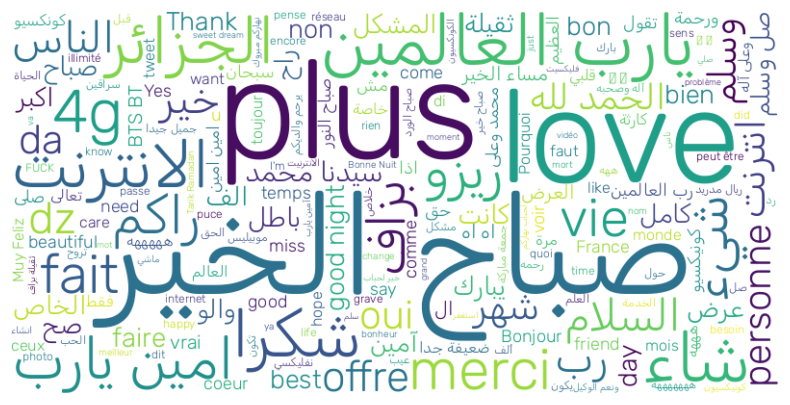

In [51]:
text = ' '.join(df['Post'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=list(combined_stop_words), font_path='Rubik-VariableFont_wght.ttf').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['Polarity Class'].astype('string')

,Polarity Class
0,1.0
1,1.0
3,0.0
4,0.0
5,0.0
...,...
21579,<NA>
21580,<NA>
21583,<NA>
21584,<NA>


In [31]:
df = df[df['Polarity Class'] != 'Neutral']
df['Polarity Class'].value_counts(normalize=True)

,proportion
Polarity Class,
0,0.405236
1,0.374980
Positive,0.129958
Negative,0.089826


In [32]:
df_copy = df.copy()

In [33]:
label_mapping = {
    'Positive': 1,
    'Negative': 0,
    1: 1,
    0: 0
}
df['Polarity Class'] = df['Polarity Class'].map(label_mapping)

In [34]:
df['Polarity Class'] = df['Polarity Class'].astype(int)
df.sample(5)

,Post,Polarity Class
15264,. والصبح إذا تنفس اجعل لـ صباحك نفس مميز توكل ...,1
18934,mm ana ya khoya tal3t application mais mahbtch...,0
2560,رحمه الله,1
9697,new wallpaper,1
5569,الموجود يشهد الوجود بأشكال الحال.,1


In [ ]:
print(df['Polarity Class'].isna().sum())  # Number of NA values
print(df['Polarity Class'].isin([float('inf'), float('-inf')]).sum())  # Number of inf values

15586
0


In [ ]:
# Attention
df['Polarity Class'].info()

<class 'pandas.core.series.Series'>
Index: 19137 entries, 0 to 21585
Series name: Polarity Class
Non-Null Count  Dtype
--------------  -----
19137 non-null  int64
dtypes: int64(1)
memory usage: 299.0 KB


In [ ]:
df.shape

(4055, 2)

<MODEL *TRAINING*>

In [35]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 51.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [54]:
!python -m spacy download ar_core_news_sm


✘ No compatible package found for 'ar_core_news_sm' (spaCy v3.7.5)



In [ ]:
# nlp = spacy.load('fr_core_news_sm')

In [38]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [39]:
df['Entities'] = df['Post'].apply(extract_entities)

In [47]:
# df.drop("Entities", axis=1, inplace=True)
df.sample(10)

,Post,Polarity Class
19806,2ملاين مكلامات غي الووو راك تسمع فيا,0
11740,انذار الحرب,0
14847,روتين الاعتناء بالنفس,1
19790,.dz,1
4185,hhhhhhhh ya hafid hhhhhh,1
6187,Maes - Billets verts j’kiff,1
19040,Cnx fi hala,0
10860,MDR,1
20121,وش بيها الكونكسيون,0
789,Vivement le match retour,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(df['Post'], df['Polarity Class'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1, 1), stop_words=list(combined_stop_words))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algeria', 'djezzy', 'اك', 'ال', 'اه', 'تسم', 'حا', 'حت', 'هك'] not in stop_words.
  warnings.warn(


In [53]:
svm_model = SVC()

svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8811389759665622
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88      1893
           1       0.86      0.92      0.89      1935

    accuracy                           0.88      3828
   macro avg       0.88      0.88      0.88      3828
weighted avg       0.88      0.88      0.88      3828



In [ ]:
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_tfidf, y_train)
# y_pred = model.predict(X_test_tfidf)


# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
df.shape

(4055, 2)

<h1>spaCy Model training</h1>